# **Version 1**
Built a CNN model and trained the data on it. 
But clearly it overfits the data on the training set.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
import os

In [3]:
TRAIN_DIR = "dataset/cat_dog/"

In [5]:
cat_dir = os.path.join(TRAIN_DIR,"cat/")
dog_dir = os.path.join(TRAIN_DIR,"dog/")

In [7]:
cat_dir_name = os.listdir(cat_dir)
cat_dir_name[:10]

['00000-4122619873.png',
 '00001-4122619874.png',
 '00002-4122619875.png',
 '00003-4122619876.png',
 '00004-4122619877.png',
 '00005-4122619878.png',
 '00006-4122619879.png',
 '00007-4122619880.png',
 '00008-4122619881.png',
 '00009-4122619882.png']

In [8]:
dog_dir_name = os.listdir(dog_dir)
dog_dir_name[:10]

['00500-3846168662.png',
 '00501-3846168663.png',
 '00502-3846168664.png',
 '00503-3846168665.png',
 '00504-3846168666.png',
 '00505-3846168667.png',
 '00506-3846168668.png',
 '00507-3846168669.png',
 '00508-3846168670.png',
 '00509-3846168671.png']

In [9]:
len(dog_dir_name),len(cat_dir_name)

(500, 500)

In [11]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    shuffle=True,
    image_size=(256,256),
    validation_split=0.2,
    subset="training",
    color_mode="rgb",
    seed=42
)

Found 1000 files belonging to 2 classes.
Using 800 files for training.


In [12]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256),
    validation_split = 0.2,
    subset="validation",
    color_mode="rgb",
    seed=42
)

Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [13]:
def image_normalization(image,label):
    image = image/255.0
    return image,label

In [14]:
train_data = train_dataset.map(image_normalization)
val_data = validation_dataset.map(image_normalization)

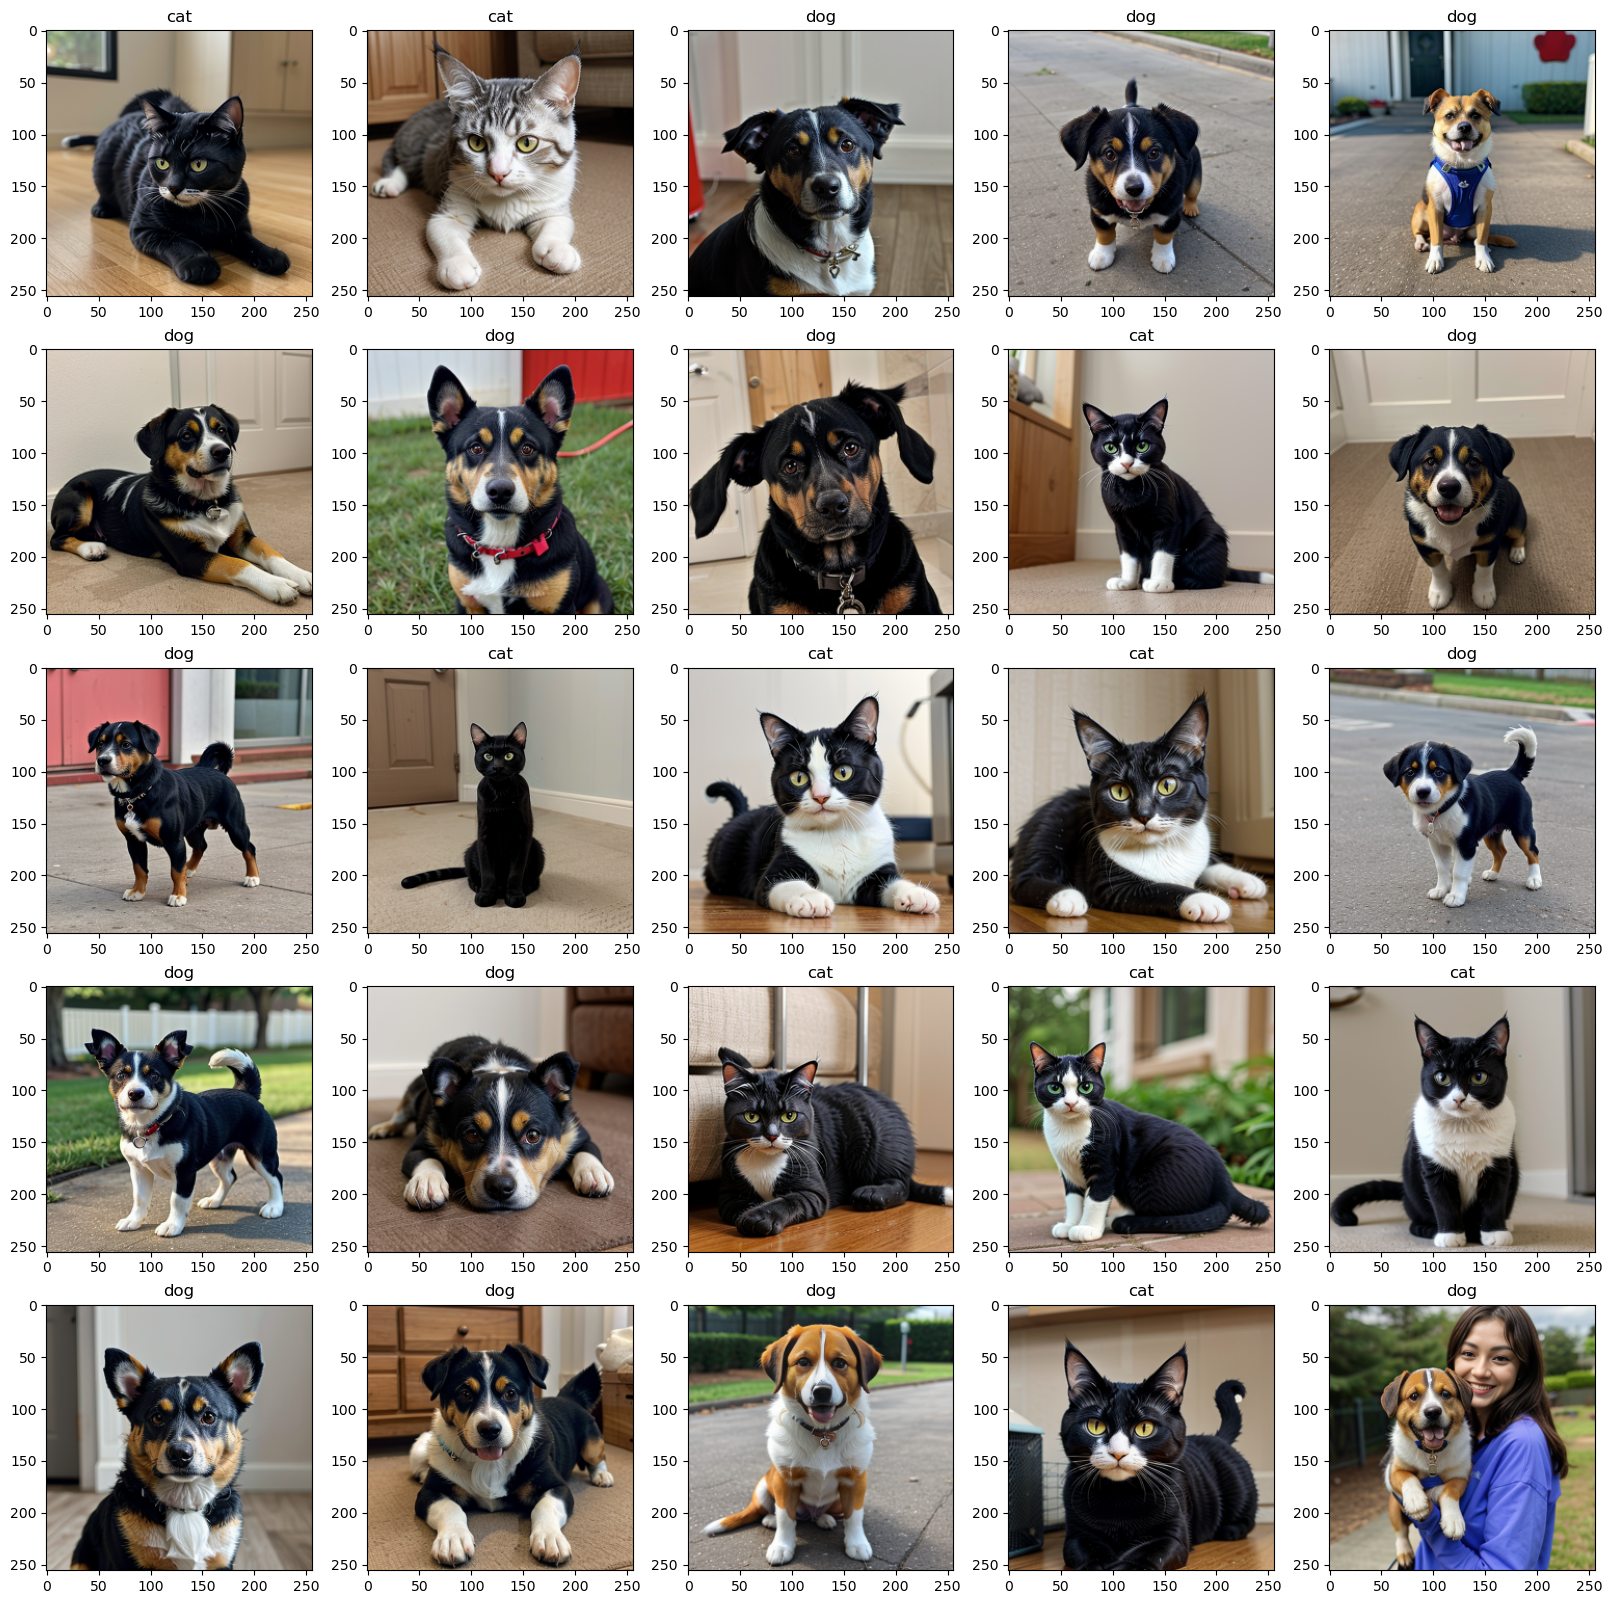

In [17]:
class_names = train_dataset.class_names
for images,labels in train_data.take(1):
    plt.figure(figsize=(20,20))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
    plt.show()

In [23]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(256,256,3)),
        tf.keras.layers.Conv2D(32,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.summary()
    return model


In [24]:
model = create_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                      

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_data,epochs=25,validation_data=val_data, verbose=2)

Epoch 1/25
25/25 - 4s - loss: 0.4313 - accuracy: 0.8388 - val_loss: 0.9251 - val_accuracy: 0.5050 - 4s/epoch - 164ms/step
Epoch 2/25
25/25 - 3s - loss: 0.1046 - accuracy: 0.9700 - val_loss: 0.7979 - val_accuracy: 0.4400 - 3s/epoch - 116ms/step
Epoch 3/25
25/25 - 3s - loss: 0.1137 - accuracy: 0.9712 - val_loss: 1.5775 - val_accuracy: 0.5050 - 3s/epoch - 112ms/step
Epoch 4/25
25/25 - 3s - loss: 0.0870 - accuracy: 0.9750 - val_loss: 1.3170 - val_accuracy: 0.4950 - 3s/epoch - 123ms/step
Epoch 5/25
25/25 - 3s - loss: 0.0562 - accuracy: 0.9837 - val_loss: 2.5332 - val_accuracy: 0.5050 - 3s/epoch - 113ms/step
Epoch 6/25
25/25 - 3s - loss: 0.0147 - accuracy: 0.9937 - val_loss: 0.9067 - val_accuracy: 0.5050 - 3s/epoch - 115ms/step
Epoch 7/25
25/25 - 3s - loss: 0.1360 - accuracy: 0.9600 - val_loss: 4.7825 - val_accuracy: 0.4950 - 3s/epoch - 115ms/step
Epoch 8/25
25/25 - 3s - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.6778 - val_accuracy: 0.7750 - 3s/epoch - 114ms/step
Epoch 9/25
25/25 - 3s - 

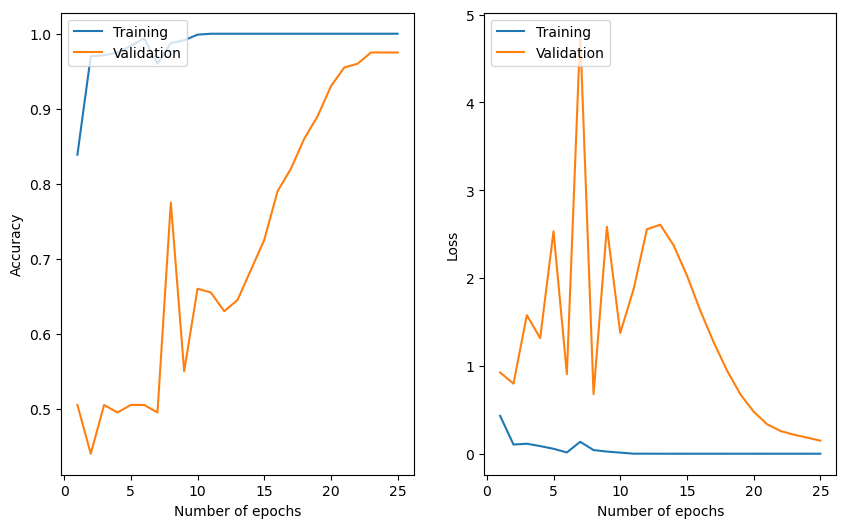

In [40]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(np.arange(1,26),history.history['accuracy'],label = 'Training')
plt.plot(np.arange(1,26),history.history['val_accuracy'],label='Validation')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left') 

plt.subplot(1,2,2)
plt.plot(np.arange(1,26),history.history['loss'],label = 'Training')
plt.plot(np.arange(1,26),history.history['val_loss'],label='Validation')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend(loc='upper left') 
plt.show()

In [27]:
def create_model_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(256, 256, 3)),
        
        # First Conv Block
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.BatchNormalization(),
        
        # Second Conv Block
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.BatchNormalization(),
        
        # Third Conv Block
        tf.keras.layers.Conv2D(128, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.BatchNormalization(),
        # Dropout after Conv Block
        tf.keras.layers.Dropout(0.3),  # Adding dropout
        
        # Fourth Conv Block
        tf.keras.layers.Conv2D(256, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.BatchNormalization(),
        
        # Fifth Conv Block
        tf.keras.layers.Conv2D(256, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Flatten(),
        
        # First Dense Block
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout after dense layer
        
        # Second Dense Block
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout after dense layer
        
        # Third Dense Block
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),  # Dropout here
        
        # Fourth Dense Block
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),  # Dropout here
        
        # Fifth Dense Block
        tf.keras.layers.Dense(128, activation='relu'),
        
        # Output Layer (Binary classification)
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.summary()
    return model

In [28]:
model2=create_model_dropout()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 127, 127, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                      

In [29]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history2 = model2.fit(train_data,epochs=25,validation_data=val_data, verbose=2)

Epoch 1/25
25/25 - 4s - loss: 0.7725 - accuracy: 0.6062 - val_loss: 0.6950 - val_accuracy: 0.5050 - 4s/epoch - 169ms/step
Epoch 2/25
25/25 - 3s - loss: 0.4949 - accuracy: 0.7850 - val_loss: 0.7777 - val_accuracy: 0.5050 - 3s/epoch - 114ms/step
Epoch 3/25
25/25 - 3s - loss: 0.2029 - accuracy: 0.9125 - val_loss: 3.9064 - val_accuracy: 0.5050 - 3s/epoch - 115ms/step
Epoch 4/25
25/25 - 3s - loss: 0.1517 - accuracy: 0.9488 - val_loss: 1.7449 - val_accuracy: 0.5050 - 3s/epoch - 122ms/step
Epoch 5/25
25/25 - 3s - loss: 0.1364 - accuracy: 0.9600 - val_loss: 6.1098 - val_accuracy: 0.5050 - 3s/epoch - 116ms/step
Epoch 6/25
25/25 - 3s - loss: 0.1056 - accuracy: 0.9712 - val_loss: 1.8254 - val_accuracy: 0.5050 - 3s/epoch - 114ms/step
Epoch 7/25
25/25 - 3s - loss: 0.0472 - accuracy: 0.9850 - val_loss: 4.8801 - val_accuracy: 0.5050 - 3s/epoch - 121ms/step
Epoch 8/25
25/25 - 3s - loss: 0.1048 - accuracy: 0.9775 - val_loss: 0.5222 - val_accuracy: 0.7350 - 3s/epoch - 117ms/step
Epoch 9/25
25/25 - 3s - 

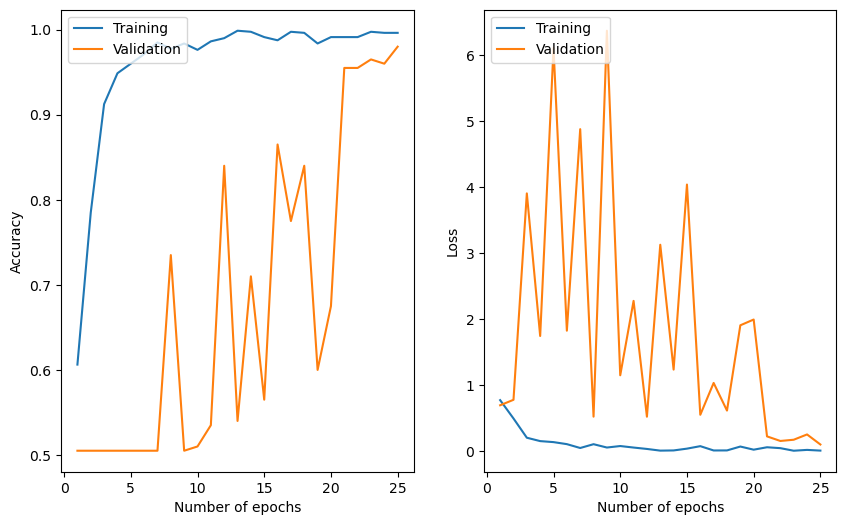

In [39]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(np.arange(1,26),history2.history['accuracy'],label = 'Training')
plt.plot(np.arange(1,26),history2.history['val_accuracy'],label='Validation')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left') 

plt.subplot(1,2,2)
plt.plot(np.arange(1,26),history2.history['loss'],label = 'Training')
plt.plot(np.arange(1,26),history2.history['val_loss'],label='Validation')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend(loc='upper left') 
plt.show()

In [11]:
def create_model_3():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(256,256,3)),
        tf.keras.layers.Conv2D(32,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256,3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.summary()
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [1]:
print("\n\n\n\n")


# **Version 2**
Using Data Augmentation an analysing the result

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
TRAIN_DIR = "dataset/cat_dog/"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
val_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=.2
)

In [8]:
train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(256,256),
    class_mode='binary',
    subset='training'
)

val_data = val_generator.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(256,256),
    class_mode='binary',
    subset='validation'
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [12]:
model = create_model_3()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 127, 127, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                      

In [13]:
history = model.fit(train_data, epochs=25, validation_data=val_data, verbose=2)

Epoch 1/25
25/25 - 23s - loss: 0.4714 - accuracy: 0.7725 - val_loss: 1.0525 - val_accuracy: 0.5000 - 23s/epoch - 936ms/step
Epoch 2/25
25/25 - 17s - loss: 0.2153 - accuracy: 0.9062 - val_loss: 2.2193 - val_accuracy: 0.5000 - 17s/epoch - 698ms/step
Epoch 3/25
25/25 - 18s - loss: 0.1750 - accuracy: 0.9413 - val_loss: 3.8429 - val_accuracy: 0.5000 - 18s/epoch - 701ms/step
Epoch 4/25
25/25 - 18s - loss: 0.1254 - accuracy: 0.9625 - val_loss: 2.7760 - val_accuracy: 0.5000 - 18s/epoch - 728ms/step
Epoch 5/25
25/25 - 17s - loss: 0.0710 - accuracy: 0.9750 - val_loss: 4.9750 - val_accuracy: 0.5000 - 17s/epoch - 696ms/step
Epoch 6/25
25/25 - 17s - loss: 0.1142 - accuracy: 0.9650 - val_loss: 3.1645 - val_accuracy: 0.5000 - 17s/epoch - 675ms/step
Epoch 7/25
25/25 - 17s - loss: 0.0796 - accuracy: 0.9737 - val_loss: 1.8722 - val_accuracy: 0.5000 - 17s/epoch - 683ms/step
Epoch 8/25
25/25 - 18s - loss: 0.0754 - accuracy: 0.9700 - val_loss: 2.9767 - val_accuracy: 0.5000 - 18s/epoch - 721ms/step
Epoch 9/

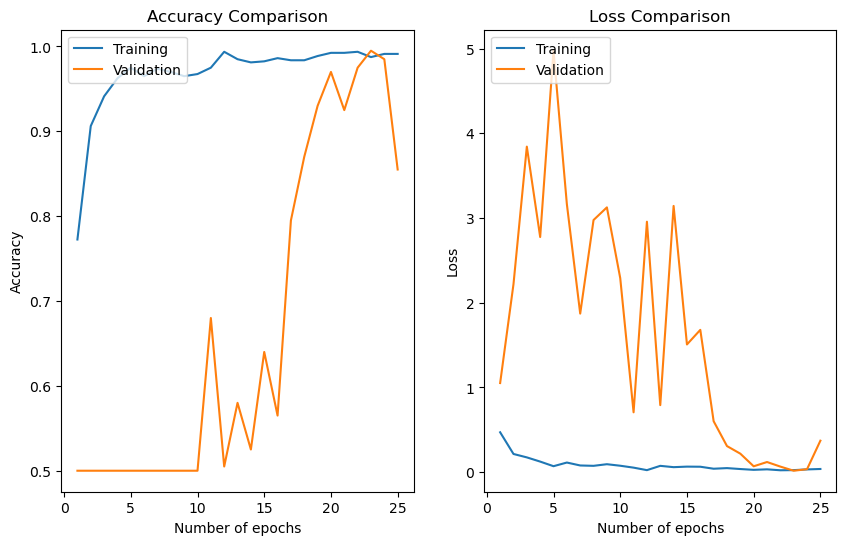

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(np.arange(1,26),history.history['accuracy'],label = 'Training')
plt.plot(np.arange(1,26),history.history['val_accuracy'],label='Validation')
plt.title("Accuracy Comparison")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left') 

plt.subplot(1,2,2)
plt.plot(np.arange(1,26),history.history['loss'],label = 'Training')
plt.plot(np.arange(1,26),history.history['val_loss'],label='Validation')
plt.title("Loss Comparison")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend(loc='upper left') 
plt.show()

# **Version 3**
## Using pretrained VGG16 model

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))
vgg16_model.trainable = False

58889256/58889256 [==============================] - 15s 0us/step


In [16]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [39]:
from tensorflow.keras import Model
inputs = tf.keras.Input(shape=(256,256,3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x=vgg16_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)  # Increased units
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_vgg16 = Model(inputs = inputs, outputs = outputs)
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_vgg16.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 tf.__operators__.getitem_8   (None, 256, 256, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_8 (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_7   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                           

In [40]:
epoch=10
history_vgg16 = model_vgg16.fit(train_data,validation_data=val_data, epochs=epoch,verbose=2)

Epoch 1/10
25/25 - 19s - loss: 0.8440 - accuracy: 0.5138 - val_loss: 0.6939 - val_accuracy: 0.4800 - 19s/epoch - 762ms/step
Epoch 2/10
25/25 - 17s - loss: 0.7679 - accuracy: 0.5312 - val_loss: 0.7068 - val_accuracy: 0.5000 - 17s/epoch - 699ms/step
Epoch 3/10
25/25 - 17s - loss: 0.7591 - accuracy: 0.5050 - val_loss: 0.6925 - val_accuracy: 0.5000 - 17s/epoch - 690ms/step
Epoch 4/10
25/25 - 18s - loss: 0.7332 - accuracy: 0.5100 - val_loss: 0.6917 - val_accuracy: 0.5300 - 18s/epoch - 721ms/step
Epoch 5/10
25/25 - 17s - loss: 0.7337 - accuracy: 0.5013 - val_loss: 0.6942 - val_accuracy: 0.5000 - 17s/epoch - 695ms/step
Epoch 6/10
25/25 - 18s - loss: 0.7194 - accuracy: 0.4837 - val_loss: 0.6909 - val_accuracy: 0.5000 - 18s/epoch - 703ms/step
Epoch 7/10
25/25 - 18s - loss: 0.7062 - accuracy: 0.5025 - val_loss: 0.6916 - val_accuracy: 0.5000 - 18s/epoch - 721ms/step
Epoch 8/10
25/25 - 18s - loss: 0.7062 - accuracy: 0.5113 - val_loss: 0.6924 - val_accuracy: 0.5000 - 18s/epoch - 701ms/step
Epoch 9/

In [25]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print(f"Available GPU(s): {gpus}")
else:
    print("No GPU found. Running on CPU.")

Available GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
model2 = tf.keras.models.Sequential(layers=vgg16_model.layers)

# Flatten the output of VGG16 to feed it into dense layers
model2.add(Flatten())

# Add custom fully connected layers
model2.add(Dense(128, activation='relu'))  # Hidden layer
model2.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

In [29]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing the model summary
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 64, 64, 256)      

In [30]:
history2 = model2.fit(train_data,epochs=epoch,validation_data=val_data, verbose=2)

Epoch 1/10
25/25 - 20s - loss: 0.4589 - accuracy: 0.8925 - val_loss: 0.0075 - val_accuracy: 1.0000 - 20s/epoch - 786ms/step
Epoch 2/10
25/25 - 17s - loss: 0.0295 - accuracy: 0.9925 - val_loss: 0.0046 - val_accuracy: 1.0000 - 17s/epoch - 676ms/step
Epoch 3/10
25/25 - 17s - loss: 0.0201 - accuracy: 0.9950 - val_loss: 7.3511e-04 - val_accuracy: 1.0000 - 17s/epoch - 690ms/step
Epoch 4/10
25/25 - 17s - loss: 0.0158 - accuracy: 0.9925 - val_loss: 0.0074 - val_accuracy: 1.0000 - 17s/epoch - 672ms/step
Epoch 5/10
25/25 - 18s - loss: 0.0223 - accuracy: 0.9925 - val_loss: 5.4013e-04 - val_accuracy: 1.0000 - 18s/epoch - 714ms/step
Epoch 6/10
25/25 - 17s - loss: 0.0109 - accuracy: 0.9962 - val_loss: 6.0865e-04 - val_accuracy: 1.0000 - 17s/epoch - 691ms/step
Epoch 7/10
25/25 - 18s - loss: 0.0091 - accuracy: 0.9975 - val_loss: 3.9015e-04 - val_accuracy: 1.0000 - 18s/epoch - 733ms/step
Epoch 8/10
25/25 - 18s - loss: 0.0108 - accuracy: 0.9950 - val_loss: 8.6112e-04 - val_accuracy: 1.0000 - 18s/epoch -

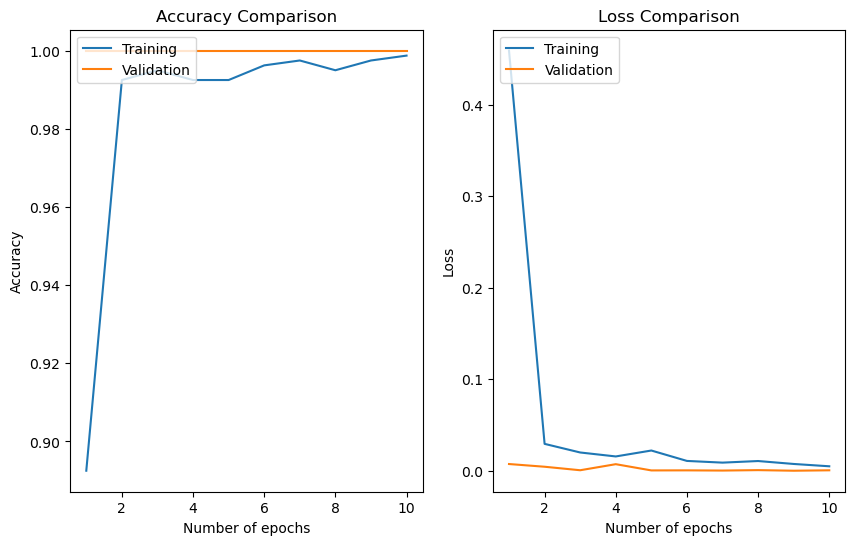

In [31]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(np.arange(1,epoch+1),history2.history['accuracy'],label = 'Training')
plt.plot(np.arange(1,epoch+1),history2.history['val_accuracy'],label='Validation')
plt.title("Accuracy Comparison")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left') 

plt.subplot(1,2,2)
plt.plot(np.arange(1,epoch+1),history2.history['loss'],label = 'Training')
plt.plot(np.arange(1,epoch+1),history2.history['val_loss'],label='Validation')
plt.title("Loss Comparison")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend(loc='upper left') 
plt.show()

# **Version 4**
## Training with MobileNetv3

In [58]:
from tensorflow.keras.applications import MobileNetV3Large
mob_model = MobileNetV3Large(weights='imagenet',include_top=False,input_shape=(224,224,3))
mob_model.trainable=False

12683000/12683000 [==============================] - 4s 0us/step


In [59]:
mob_model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_17[0][0]']               
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_3[0][0]']            
                                )                                                                 
                                                                                   

In [62]:
from tensorflow.keras.layers import GlobalAveragePooling2D
model3 = tf.keras.models.Sequential()
model3.add(mob_model)
model3.add(GlobalAveragePooling2D())
model3.add(Dense(128,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing the model summary
model3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d_8   (None, 960)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_35 (Dense)            (None, 128)               123008    
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
Total params: 3,119,489
Trainable params: 123,137
Non-trainable params: 2,996,352
_________________________________________________________________


In [65]:
model3.fit(train_data,epochs=epoch, validation_data=val_data,verbose=2)

Epoch 1/10
25/25 - 14s - loss: 0.7025 - accuracy: 0.5250 - val_loss: 0.6902 - val_accuracy: 0.5050 - 14s/epoch - 568ms/step
Epoch 2/10
25/25 - 11s - loss: 0.6845 - accuracy: 0.5537 - val_loss: 0.6944 - val_accuracy: 0.5000 - 11s/epoch - 447ms/step
Epoch 3/10
25/25 - 11s - loss: 0.6793 - accuracy: 0.5962 - val_loss: 0.6758 - val_accuracy: 0.5850 - 11s/epoch - 446ms/step
Epoch 4/10
25/25 - 11s - loss: 0.6722 - accuracy: 0.6275 - val_loss: 0.6699 - val_accuracy: 0.6050 - 11s/epoch - 446ms/step
Epoch 5/10
25/25 - 11s - loss: 0.6739 - accuracy: 0.6050 - val_loss: 0.6671 - val_accuracy: 0.5650 - 11s/epoch - 445ms/step
Epoch 6/10
25/25 - 11s - loss: 0.6617 - accuracy: 0.6112 - val_loss: 0.6751 - val_accuracy: 0.5200 - 11s/epoch - 448ms/step
Epoch 7/10
25/25 - 11s - loss: 0.6532 - accuracy: 0.6000 - val_loss: 0.6731 - val_accuracy: 0.5750 - 11s/epoch - 445ms/step
Epoch 8/10
25/25 - 11s - loss: 0.6643 - accuracy: 0.5813 - val_loss: 0.6515 - val_accuracy: 0.6300 - 11s/epoch - 449ms/step
Epoch 9/

In [56]:
train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    subset='training'
)

val_data = val_generator.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    subset='validation'
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [64]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset= train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = val_data.cache().prefetch(buffer_size=AUTOTUNE)

AttributeError: 'DirectoryIterator' object has no attribute 'cache'